In [52]:
import librosa  # python package for music and audio analysis
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import noisereduce as nr
from jupyterthemes import jtplot


In [53]:
jtplot.style(theme='monokai', context='notebook', ticks=True, gridlines='--')

In [54]:
mp3Folder = os.path.join("bird_data","wav_files")
mp3Files = os.listdir(mp3Folder)
test = os.path.join(mp3Folder, mp3Files[0])

In [55]:
signal, sr = librosa.load(test, sr=22050, mono=True)

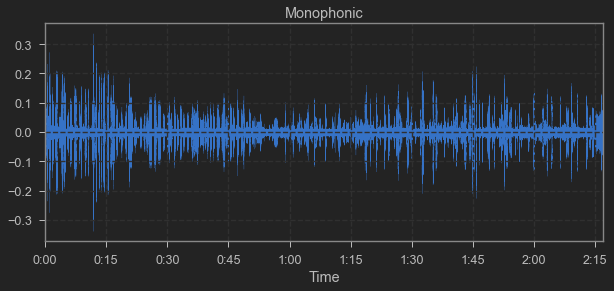

In [56]:
# plot recording signal
plt.figure(figsize=(10, 4))
librosa.display.waveplot(signal, sr=sr)
plt.title('Monophonic')
plt.show()

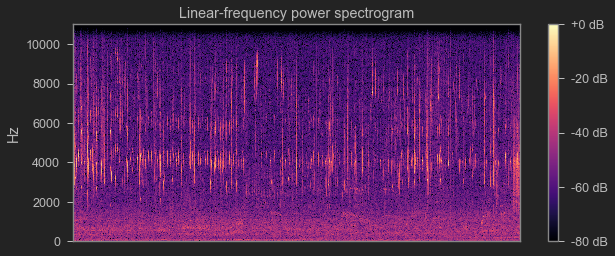

In [57]:
# Plot spectogram
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

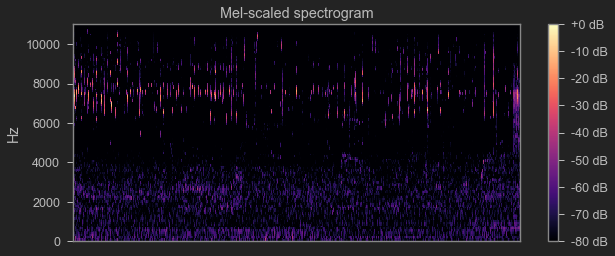

In [58]:
# Plot mel-spectrogram
N_FFT = 1024         
HOP_SIZE = 1024       
N_MELS = 128            
WIN_SIZE = 1024      
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 0 

S = librosa.feature.melspectrogram(y=signal,sr=sr, n_fft=N_FFT, hop_length=HOP_SIZE, n_mels=N_MELS, htk=True, fmin=FMIN, fmax=sr/2) 
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-scaled spectrogram')
plt.show()

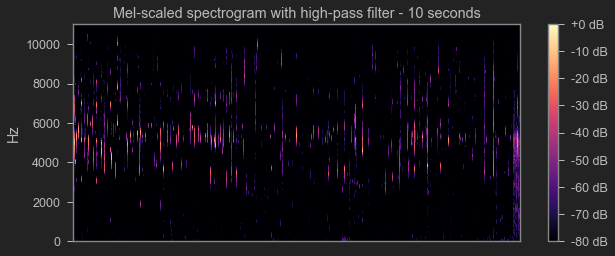

In [59]:
# Plot mel-spectrogram with high-pass filter
N_FFT = 1024         
HOP_SIZE = 1024       
N_MELS = 128            
WIN_SIZE = 1024      
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 1400 

S = librosa.feature.melspectrogram(y=signal,sr=sr, n_fft=N_FFT, hop_length=HOP_SIZE, n_mels=N_MELS, htk=True, fmin=FMIN, fmax=sr/2) 

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-scaled spectrogram with high-pass filter - 10 seconds')
plt.show()

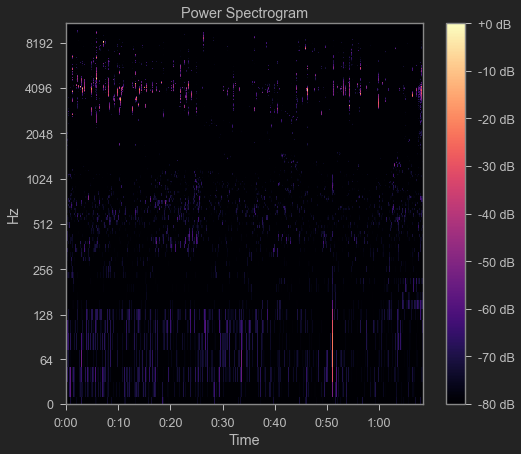

In [60]:
# Plot Short-time Fourier transform (STFT)
N_FFT = 1024         
HOP_SIZE = 1024       
N_MELS = 128            
WIN_SIZE = 1024      
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 1400 
S = librosa.stft(y=signal, n_fft=N_FFT, hop_length=HOP_SIZE, center=True, win_length=WIN_SIZE, window = 'hamming') 

fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S**2,ref=np.max), fmin=FMIN, x_axis='time', y_axis='log', ax=ax, )
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set_title('Power Spectrogram')
plt.show()